In [2]:
import pandas as pd
import geopandas as gp
import json
import matplotlib.pyplot as plt

In [353]:
#getting the data and manipulating it 

population_df = gp.read_file('/Users/poliveira/Library/CloudStorage/OneDrive-CityUniversityofNewYork/CUNY/Spring 24/GEO_COMPUTATION/final_project/data_sets/populacao')
average_age_df = gp.read_file('/Users/poliveira/Library/CloudStorage/OneDrive-CityUniversityofNewYork/CUNY/Spring 24/GEO_COMPUTATION/final_project/data_sets/projecao_idade_media/idade_meia_projecao.shp')
urbanization_df = gp.read_file('/Users/poliveira/Library/CloudStorage/OneDrive-CityUniversityofNewYork/CUNY/Spring 24/GEO_COMPUTATION/final_project/data_sets/projecao_grau_de_urbanizacao/grau_de_urbanizacao_projecao.shp')
elderly_ix_df = gp.read_file('/Users/poliveira/Library/CloudStorage/OneDrive-CityUniversityofNewYork/CUNY/Spring 24/GEO_COMPUTATION/final_project/data_sets/indice_envelhecimento/indice_envelhecimento.shp')
mortality_df = gp.read_file('/Users/poliveira/Library/CloudStorage/OneDrive-CityUniversityofNewYork/CUNY/Spring 24/GEO_COMPUTATION/final_project/data_sets/obitos/obitos.shp')
growth_df = gp.read_file('/Users/poliveira/Library/CloudStorage/OneDrive-CityUniversityofNewYork/CUNY/Spring 24/WEB_GIS/sp_data/taxas_crescimento_anual/TX CRESC ANUAL.shp')

In [368]:
growth_df.columns

Index(['COD_IBGE0', 'NOME', 'Rotulo', 'AREA_KM2', 'Tx_Cres', 'geometry'], dtype='object')

In [369]:
growth_rename = {
    'ROTULO':'Rotulo'
}

growth_df.rename(columns=growth_rename, inplace=True)
#growth_df_df

elderly_ix_rename = {
    'indenvelhe': 'elderly2019',
    'ROTULO':'Rotulo'
}

elderly_ix_df.rename(columns=elderly_ix_rename, inplace=True)
#elderly_ix_df


mortality_rename = {
    'total': 'morta2019',
    'mun':'Rotulo'
}

mortality_df.rename(columns=mortality_rename, inplace=True)
#mortality_df


average_age_rename = {
    'a1991': 'AGEAVR1991',
    'a2000': 'AGEAVR2000',
    'a2010': 'AGEAVR2010',
    'a2020': 'AGEAVR2020',
    'a2030': 'AGEAVR2030',
    'a2040': 'AGEAVR2040',
    'a2050': 'AGEAVR2050',
    'ROTULO':'Rotulo'
}

average_age_df.rename(columns=average_age_rename, inplace=True)
#average_age_df

urbanization_rename = {
    'a1991': 'URB1991',
    'a2000': 'URB2000',
    'a2010': 'URB2010',
    'a2020': 'URB2020',
    'a2030': 'URB2030',
    'a2040': 'URB2040',
    'a2050': 'URB2050',
    'ROTULO': 'Rotulo'
}

urbanization_df.rename(columns=urbanization_rename, inplace=True)

#urbanization_df

In [6]:
desired_rows = population_df[population_df['Nome'] == 'Guarulhos']
desired_rows

projected_crs = 'EPSG:3395'

crs_population_df = population_df.to_crs(projected_crs)

In [ ]:
sao_paulo_centroid = crs_population_df.centroid.iloc[562]
distance = ['Rotulo','Distance','Category']
distance_df = pd.DataFrame(index=range(645),columns=distance)


In [38]:
for i in range (645):

    centroid_new  = crs_population_df.centroid.iloc[i]

    distance_df.loc[i,"Distance"] = sao_paulo_centroid.distance(centroid_new)
    distance_df.loc[i,"Rotulo"] = crs_population_df.loc[i,"Rotulo"]
    
    if distance_df.loc[i,"Distance"] < 100000:
        distance_df.loc[i,"Category"] =0
    elif distance_df.loc[i,"Distance"] < 200000:
        distance_df.loc[i,"Category"] =1 
    elif distance_df.loc[i,"Distance"] < 300000:
        distance_df.loc[i,"Category"] =2
    elif distance_df.loc[i,"Distance"] < 400000:
        distance_df.loc[i,"Category"] =3 
    elif distance_df.loc[i,"Distance"] < 500000:
        distance_df.loc[i,"Category"] =4 
    elif distance_df.loc[i,"Distance"] < 600000:
        distance_df.loc[i,"Category"] =5 
    else:
        distance_df.loc[i,"Category"] =6
    
distance_df

In [365]:
merged_df = pd.merge(crs_population_df, distance_df, on='Rotulo', how='inner')

merged_df = pd.merge(merged_df, urbanization_df, on='Rotulo', how='inner')

merged_df = pd.merge(merged_df, growth_df, on='Rotulo', how='inner')

merged_df = pd.merge(merged_df, average_age_df, on='Rotulo', how='inner',suffixes=('_left', '_right'))

merged_df = pd.merge(merged_df, elderly_ix_df, on='Rotulo', how='inner')

merged_df = pd.merge(merged_df, mortality_df, on='Rotulo', how='inner',suffixes=('_left2', '_right2'))

merged_df = merged_df.drop(562)


In [173]:
merged_df 

,Cod_ibge_x,Nome_x,Rotulo,Area_Km2_x,Den_Demo,Pop,RA,RG,RM,AU,...,abr,mai,jun,jul,ago,set,out,nov,dez,geometry_right2
0,3500105,Adamantina,Adamantina,411.99,82.21,33821,RA de Presidente Prudente,RG de Adamantina,None,None,...,28,36,32,23,29,38,37,31,22,"POLYGON ((-51.17735 -21.69213, -51.17716 -21.6..."
1,3500204,Adolfo,Adolfo,211.06,16.18,3416,RA de São José do Rio Preto,RG de São José do Rio Preto,None,None,...,6,7,4,3,2,5,1,4,5,"POLYGON ((-49.74715 -21.29637, -49.74682 -21.2..."
2,3500303,Aguaí,Aguaí,474.55,76.77,36445,RA de Campinas,RG de São João da Boa Vista,None,None,...,22,19,26,28,25,27,24,25,21,"POLYGON ((-47.23298 -22.05409, -47.23289 -22.0..."
3,3500402,Águas da Prata,Águas da Prata,142.96,54.74,7826,RA de Campinas,RG de São João da Boa Vista,None,None,...,7,10,7,12,7,10,5,10,7,"POLYGON ((-46.75758 -21.84763, -46.75750 -21.8..."
4,3500501,Águas de Lindóia,Águas de Lindóia,60.13,308.80,18568,RA de Campinas,RG de Bragança Paulista,None,None,...,18,15,13,23,14,15,15,15,15,"POLYGON ((-46.66020 -22.47948, -46.66018 -22.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,3557006,Votorantim,Votorantim,183.52,664.62,122356,RA de Sorocaba,RG de Sorocaba,RM de Sorocaba,None,...,84,78,94,102,63,66,66,82,67,"POLYGON ((-47.51788 -23.54223, -47.51761 -23.5..."
628,3557105,Votuporanga,Votuporanga,420.70,221.04,93066,RA de São José do Rio Preto,RG de Votuporanga,None,None,...,60,68,57,77,73,73,71,86,58,"POLYGON ((-50.15453 -20.50451, -50.15453 -20.5..."
629,3557154,Zacarias,Zacarias,319.06,8.15,2602,RA de São José do Rio Preto,RG de São José do Rio Preto,None,None,...,0,2,1,0,0,3,0,1,2,"POLYGON ((-50.05581 -20.99883, -50.05574 -20.9..."
630,3557204,Chavantes,Chavantes,188.73,65.08,12241,RA de Marília,RG de Ourinhos,None,None,...,7,15,13,11,15,11,7,4,5,"POLYGON ((-49.82056 -23.07743, -49.82023 -23.0..."


In [ ]:
unique_categories = merged_df['Category'].unique()

# Create new DataFrames for each unique category
new_dataframes = {}
for category in unique_categories:
    new_dataframes[category] = merged_df[merged_df['Category'] == category].copy()

# Accessing the new DataFrames
print("New DataFrames:")
for category, category_df in new_dataframes.items():
    print(f"\nCategory: {category}")
    print(category_df)

In [ ]:
print("\nCalculating the number of rows in each new DataFrame:")
for category, category_df in new_dataframes.items():
    num_rows = category_df.shape[0]
    print(f"\nCategory: {category}")
    print(f"Number of rows: {num_rows}")

    
print("\nCalculating the mean of a specific column in each new DataFrame:")
for category, category_df in new_dataframes.items():
    mean_value = category_df['Pop'].mean()
    print(f"\nCategory: {category}")
    print(f"Mean of 'Value' column: {mean_value}")
    
print("\nCalculating the mean of a specific column in each new DataFrame:")
for category, category_df in new_dataframes.items():
    mean_value = category_df['Den_Demo'].mean()
    print(f"\nCategory: {category}")
    print(f"Mean of 'Value' column: {mean_value}")
    
print("\nCalculating the mean of a specific column in each new DataFrame:")
for category, category_df in new_dataframes.items():
    mean_value = category_df['Area_Km2'].mean()
    print(f"\nCategory: {category}")
    print(f"Mean of 'Value' column: {mean_value}")



In [373]:
category_df.columns

Index(['Cod_ibge_x', 'Nome_x', 'Rotulo', 'Area_Km2_x', 'Den_Demo', 'Pop', 'RA',
       'RG', 'RM', 'AU', 'RGI', 'RGINT', 'geometry_x', 'Distance', 'Category',
       'COD_IBGE0_x', 'NOME_x', 'URB1991', 'URB2000', 'URB2010', 'URB2020',
       'URB2030', 'URB2040', 'URB2050', 'geometry_y', 'COD_IBGE0_y', 'NOME_y',
       'AREA_KM2', 'Tx_Cres', 'geometry_left', 'COD_IBGE0', 'NOME',
       'AGEAVR1991', 'AGEAVR2000', 'AGEAVR2010', 'AGEAVR2020', 'AGEAVR2030',
       'AGEAVR2040', 'AGEAVR2050', 'geometry_right', 'Cod_ibge_y', 'Nome_y',
       'Area_Km2_y', 'elderly2019', 'geometry_left2', 'cod', 'morta2019',
       'jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out',
       'nov', 'dez', 'geometry_right2'],
      dtype='object')

In [374]:
stats_values = {'Category': [], 'Mean_Value_Pop': [], 'Total_pop': [], 'Max_Pop_Value': [],'Area_Total':[],'Age_Mean':[],'Morta_Mean':[],
                'Elderly_Mean':[],'Growth_Rate':[]}

# Calculate the aggregated values for each DataFrame
for category, category_df in new_dataframes.items():
    mean_value_pop = category_df['Pop'].mean()
    total_pop = category_df['Pop'].sum()
    max_value = category_df['Pop'].max()
    age_mean = category_df['AGEAVR2020'].mean()
    morta_mean = category_df['morta2019'].sum()/category_df['Pop'].sum()
    area_sum = category_df['Area_Km2_x'].sum()
    eld_mean = category_df['elderly2019'].mean()
    growth_mean = category_df['Tx_Cres'].mean()
    
    # Append values to the dictionary
    stats_values['Category'].append(category)
    stats_values['Mean_Value_Pop'].append(mean_value_pop)
    stats_values['Total_pop'].append(total_pop)
    stats_values['Max_Pop_Value'].append(max_value)
    stats_values['Age_Mean'].append(age_mean)
    stats_values['Morta_Mean'].append(morta_mean)
    stats_values['Area_Total'].append(area_sum)
    stats_values['Elderly_Mean'].append(eld_mean)
    stats_values['Growth_Rate'].append(growth_mean)


# Create a new DataFrame from the dictionary
stats_df = pd.DataFrame(stats_values)

# Display the new DataFrame
print(stats_df)

   Category  Mean_Value_Pop  Total_pop  Max_Pop_Value  Area_Total   Age_Mean  \
0         5    16621.703297    1512575         223679    34357.57  38.616484   
1         4    22270.255102    2182485         455272    36372.60  37.373469   
2         1    72484.778846    7538417        1193760    41532.61  36.143269   
3         2    28343.480392    2891035         246868    52692.67  36.036275   
4         3    32320.796460    3652250         699238    41027.88  36.819469   
5         0   182978.629630   14821269        1383287    19204.41  35.083951   
6         6    11995.904762     503828          56153    18302.21  38.902381   

   Morta_Mean  Elderly_Mean  Growth_Rate  
0    0.009179    133.094396     0.119341  
1    0.008625    109.639082     0.434286  
2    0.007231     92.992500     0.830000  
3    0.007950     93.441275     0.129412  
4    0.007915    104.911504     0.292566  
5    0.006883     79.004321     1.059259  
6    0.009225    140.910714     0.212381  


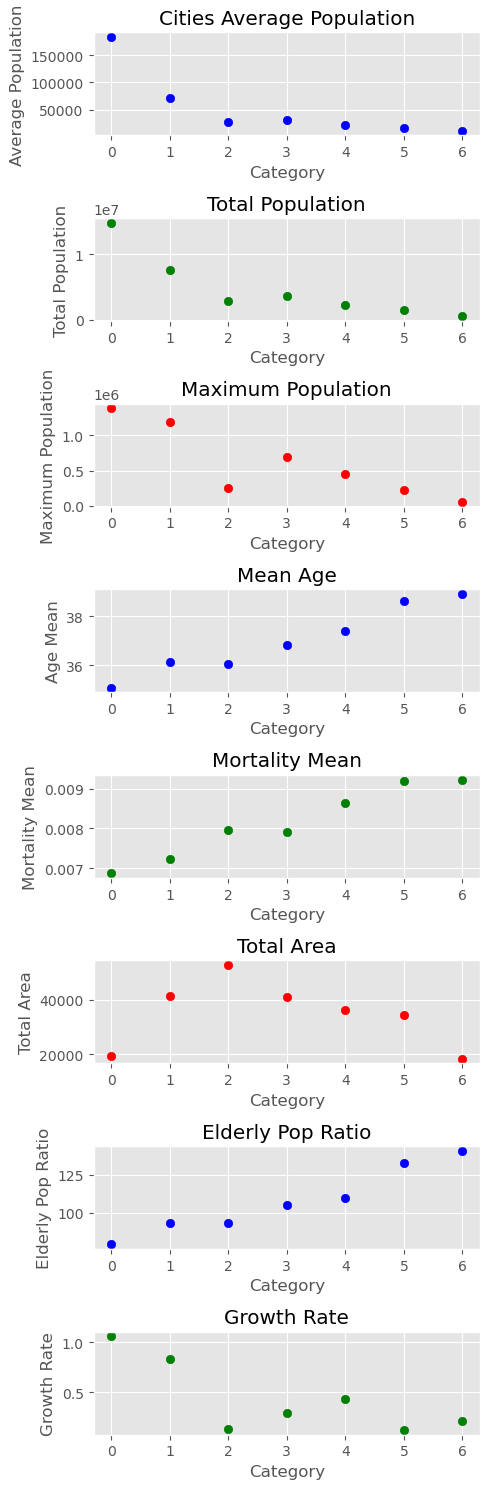

In [399]:
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(5, 15))



# Categories on the x-axis
categories = stats_df['Category']

# Aggregated values on the y-axis
mean_values = stats_df['Mean_Value_Pop']
sum_values = stats_df['Total_pop']
max_values = stats_df['Max_Pop_Value']
age_values = stats_df['Age_Mean']
morta_mean = stats_df['Morta_Mean']
area_sum = stats_df['Area_Total']
eld_mean = stats_df['Elderly_Mean']
growth_mean = stats_df['Growth_Rate']

axes[0].scatter(categories, mean_values, marker='o', color='blue')
axes[0].set_title('Cities Average Population')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Average Population')


axes[1].scatter(categories, sum_values, marker='o', color='green')
axes[1].set_title('Total Population')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Total Population')


axes[2].scatter(categories, max_values, marker='o', color='red')
axes[2].set_title('Maximum Population')
axes[2].set_xlabel('Category')
axes[2].set_ylabel('Maximum Population')


axes[3].scatter(categories, age_values, marker='o', color='blue')
axes[3].set_title('Mean Age')
axes[3].set_xlabel('Category')
axes[3].set_ylabel('Age Mean')


axes[4].scatter(categories, morta_mean , marker='o', color='green')
axes[4].set_title('Mortality Mean')
axes[4].set_xlabel('Category')
axes[4].set_ylabel('Mortality Mean')


axes[5].scatter(categories, area_sum, marker='o', color='red')
axes[5].set_title('Total Area')
axes[5].set_xlabel('Category')
axes[5].set_ylabel('Total Area')


axes[6].scatter(categories, eld_mean, marker='o', color='blue')
axes[6].set_title('Elderly Pop Ratio')
axes[6].set_xlabel('Category')
axes[6].set_ylabel('Elderly Pop Ratio')


axes[7].scatter(categories, growth_mean, marker='o', color='green')
axes[7].set_title('Growth Rate')
axes[7].set_xlabel('Category')
axes[7].set_ylabel('Growth Rate')


# Adjust layout
plt.tight_layout()


plt.savefig('plots.png')


# Show plot
plt.show()



In [216]:
crs_population_df

,Cod_ibge,Nome,Rotulo,Area_Km2,Den_Demo,Pop,RA,RG,RM,AU,RGI,RGINT,geometry
0,3500105,Adamantina,Adamantina,411.99,82.21,33821,RA de Presidente Prudente,RG de Adamantina,None,None,Adamantina - Lucélia,Presidente Prudente,"POLYGON ((-5697036.225 -2458815.267, -5697015...."
1,3500204,Adolfo,Adolfo,211.06,16.18,3416,RA de São José do Rio Preto,RG de São José do Rio Preto,None,None,São José do Rio Preto,São José do Rio Preto,"POLYGON ((-5537827.769 -2411741.225, -5537790...."
2,3500303,Aguaí,Aguaí,474.55,76.77,36445,RA de Campinas,RG de São João da Boa Vista,None,None,São João da Boa Vista,Campinas,"POLYGON ((-5257951.205 -2501983.758, -5257940...."
3,3500402,Águas da Prata,Águas da Prata,142.96,54.74,7826,RA de Campinas,RG de São João da Boa Vista,None,None,São João da Boa Vista,Campinas,"POLYGON ((-5205030.200 -2477346.500, -5205020...."
4,3500501,Águas de Lindóia,Águas de Lindóia,60.13,308.80,18568,RA de Campinas,RG de Bragança Paulista,None,None,Amparo,Campinas,"POLYGON ((-5194189.809 -2552859.614, -5194187...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,3557006,Votorantim,Votorantim,183.52,664.62,122356,RA de Sorocaba,RG de Sorocaba,RM de Sorocaba,None,Sorocaba,Sorocaba,"POLYGON ((-5289666.467 -2680665.026, -5289636...."
641,3557105,Votuporanga,Votuporanga,420.70,221.04,93066,RA de São José do Rio Preto,RG de Votuporanga,None,None,Votuporanga,São José do Rio Preto,"POLYGON ((-5583176.536 -2317933.098, -5583176...."
642,3557154,Zacarias,Zacarias,319.06,8.15,2602,RA de São José do Rio Preto,RG de São José do Rio Preto,None,None,Birigui - Penápolis,Araçatuba,"POLYGON ((-5572187.049 -2376434.228, -5572179...."
643,3557204,Chavantes,Chavantes,188.73,65.08,12241,RA de Marília,RG de Ourinhos,None,None,Ourinhos,Marília,"POLYGON ((-5545998.959 -2624642.653, -5545962...."


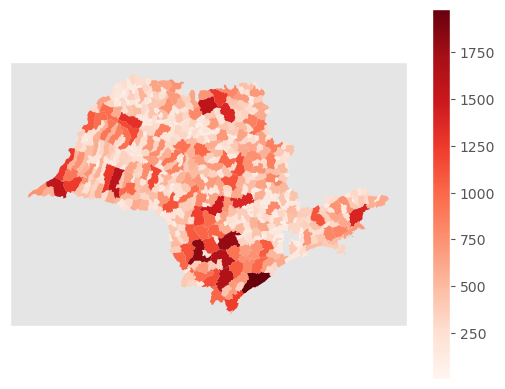

In [396]:
# Create a GeoDataFrame
gdf = gp.GeoDataFrame(crs_population_df, geometry='geometry')


# Plot the GeoDataFrame with a custom color scale
ax = gdf.plot(column='Area_Km2', cmap='Reds', legend=True)

plt.xticks([])
plt.yticks([])

plt.savefig('area_map.png')

# Show the plot
plt.show()

<Figure size 2500x500 with 0 Axes>

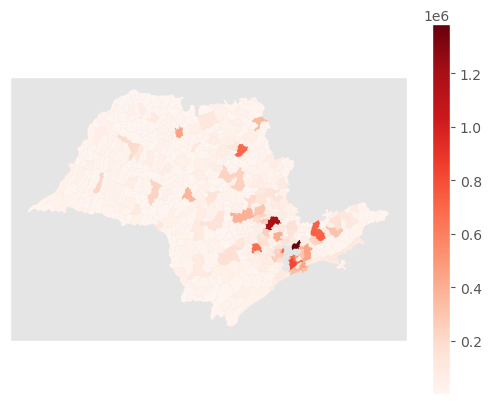

In [398]:
from matplotlib.ticker import ScalarFormatter

# Create a GeoDataFrame
gdf = gp.GeoDataFrame(crs_population_df, geometry='geometry')

plt.figure(figsize=(25, 5))
# Plot the GeoDataFrame with a custom color scale
gdf.plot(column='Pop', cmap='Reds', legend=True)

plt.xticks([])
plt.yticks([])


plt.savefig('population.png')


# Show the plot
plt.show()

<Figure size 2500x500 with 0 Axes>

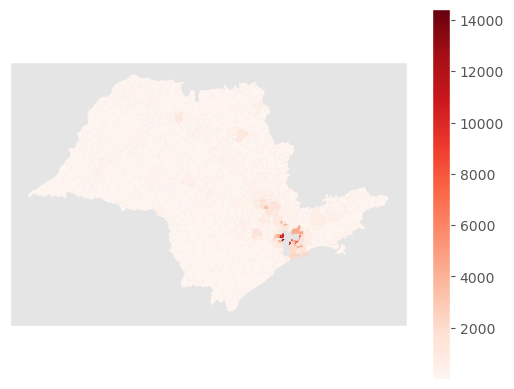

In [397]:
from matplotlib.ticker import ScalarFormatter

# Create a GeoDataFrame
gdf = gp.GeoDataFrame(crs_population_df, geometry='geometry')

plt.figure(figsize=(25, 5))
# Plot the GeoDataFrame with a custom color scale
gdf.plot(column='Den_Demo', cmap='Reds', legend=True)

plt.xticks([])
plt.yticks([])


plt.savefig('den_demo.png')


# Show the plot
plt.show()

In [235]:
columns_to_use = ['Pop', 'AGEAVR2020', 'elderly2019','Distance','morta2019']

# Calculate correlation matrix for the specified columns
correlation_matrix = merged_df[columns_to_use].corr()

# Print correlation matrix
print(correlation_matrix)


                  Pop  AGEAVR2020  elderly2019  Distance  morta2019
Pop          1.000000   -0.143246    -0.167339 -0.365656   0.987944
AGEAVR2020  -0.143246    1.000000     0.963099  0.508268  -0.096178
elderly2019 -0.167339    0.963099     1.000000  0.516600  -0.128957
Distance    -0.365656    0.508268     0.516600  1.000000  -0.346510
morta2019    0.987944   -0.096178    -0.128957 -0.346510   1.000000


In [229]:
merged_df

,Cod_ibge_x,Nome_x,Rotulo,Area_Km2_x,Den_Demo,Pop,RA,RG,RM,AU,...,abr,mai,jun,jul,ago,set,out,nov,dez,geometry_right2
0,3500105,Adamantina,Adamantina,411.99,82.21,33821,RA de Presidente Prudente,RG de Adamantina,None,None,...,28,36,32,23,29,38,37,31,22,"POLYGON ((-51.17735 -21.69213, -51.17716 -21.6..."
1,3500204,Adolfo,Adolfo,211.06,16.18,3416,RA de São José do Rio Preto,RG de São José do Rio Preto,None,None,...,6,7,4,3,2,5,1,4,5,"POLYGON ((-49.74715 -21.29637, -49.74682 -21.2..."
2,3500303,Aguaí,Aguaí,474.55,76.77,36445,RA de Campinas,RG de São João da Boa Vista,None,None,...,22,19,26,28,25,27,24,25,21,"POLYGON ((-47.23298 -22.05409, -47.23289 -22.0..."
3,3500402,Águas da Prata,Águas da Prata,142.96,54.74,7826,RA de Campinas,RG de São João da Boa Vista,None,None,...,7,10,7,12,7,10,5,10,7,"POLYGON ((-46.75758 -21.84763, -46.75750 -21.8..."
4,3500501,Águas de Lindóia,Águas de Lindóia,60.13,308.80,18568,RA de Campinas,RG de Bragança Paulista,None,None,...,18,15,13,23,14,15,15,15,15,"POLYGON ((-46.66020 -22.47948, -46.66018 -22.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,3557006,Votorantim,Votorantim,183.52,664.62,122356,RA de Sorocaba,RG de Sorocaba,RM de Sorocaba,None,...,84,78,94,102,63,66,66,82,67,"POLYGON ((-47.51788 -23.54223, -47.51761 -23.5..."
628,3557105,Votuporanga,Votuporanga,420.70,221.04,93066,RA de São José do Rio Preto,RG de Votuporanga,None,None,...,60,68,57,77,73,73,71,86,58,"POLYGON ((-50.15453 -20.50451, -50.15453 -20.5..."
629,3557154,Zacarias,Zacarias,319.06,8.15,2602,RA de São José do Rio Preto,RG de São José do Rio Preto,None,None,...,0,2,1,0,0,3,0,1,2,"POLYGON ((-50.05581 -20.99883, -50.05574 -20.9..."
630,3557204,Chavantes,Chavantes,188.73,65.08,12241,RA de Marília,RG de Ourinhos,None,None,...,7,15,13,11,15,11,7,4,5,"POLYGON ((-49.82056 -23.07743, -49.82023 -23.0..."


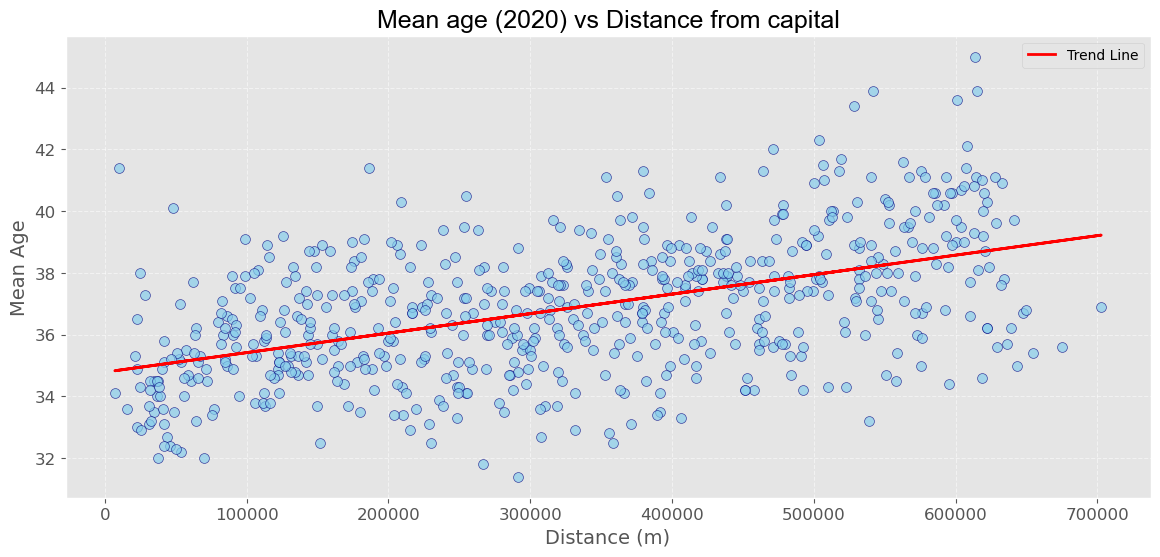

In [384]:
# Set style
plt.style.use('ggplot')

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(14, 6))

# Scatter plot
ax.scatter(merged_df['Distance'], merged_df['AGEAVR2020'], color='skyblue', edgecolor='navy', alpha=0.7, s=50)

merged_df['Distance'] = pd.to_numeric(merged_df['Distance'])
merged_df['AGEAVR2020'] = pd.to_numeric(merged_df['AGEAVR2020'])

m, b = np.polyfit(merged_df['Distance'], merged_df['AGEAVR2020'], 1)
ax.plot(merged_df['Distance'], m * merged_df['Distance'] + b, color='red', linestyle='-', linewidth=2, label='Trend Line')

# Set labels and title

# Set labels and title
ax.set_title('Mean age (2020) vs Distance from capital', fontsize=18, fontname='Arial')
ax.set_xlabel('Distance (m)', fontsize=14)
ax.set_ylabel('Mean Age', fontsize=14)
ax.legend()

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('mean_age.png')

# Show plot
plt.show()


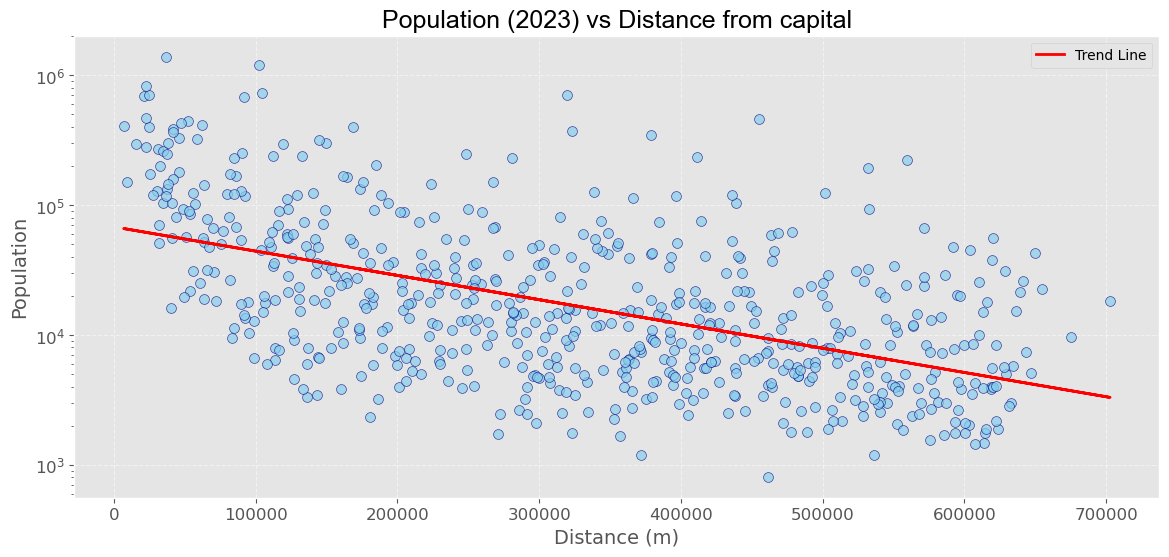

In [383]:
import numpy as np

# Set style
plt.style.use('ggplot')

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(14, 6))

merged_df['Distance'] = pd.to_numeric(merged_df['Distance'])
merged_df['Pop'] = pd.to_numeric(merged_df['Pop'])


# Scatter plot
ax.scatter(merged_df['Distance'], merged_df['Pop'], color='skyblue', edgecolor='navy', alpha=0.7, s=50)


params = np.polyfit(merged_df['Distance'], np.log(merged_df['Pop']), 1)
a = np.exp(params[1])
b = params[0]
ax.plot(merged_df['Distance'], a * np.exp(b * merged_df['Distance']), color='red', linestyle='-', linewidth=2, label='Trend Line')

# Set labels and title
ax.set_title('Population (2023) vs Distance from capital', fontsize=18, fontname='Arial')
ax.set_xlabel('Distance (m)', fontsize=14)
ax.set_ylabel('Population', fontsize=14)
ax.legend()

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

ax.set_yscale('log')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('population.png')

# Show plot
plt.show()

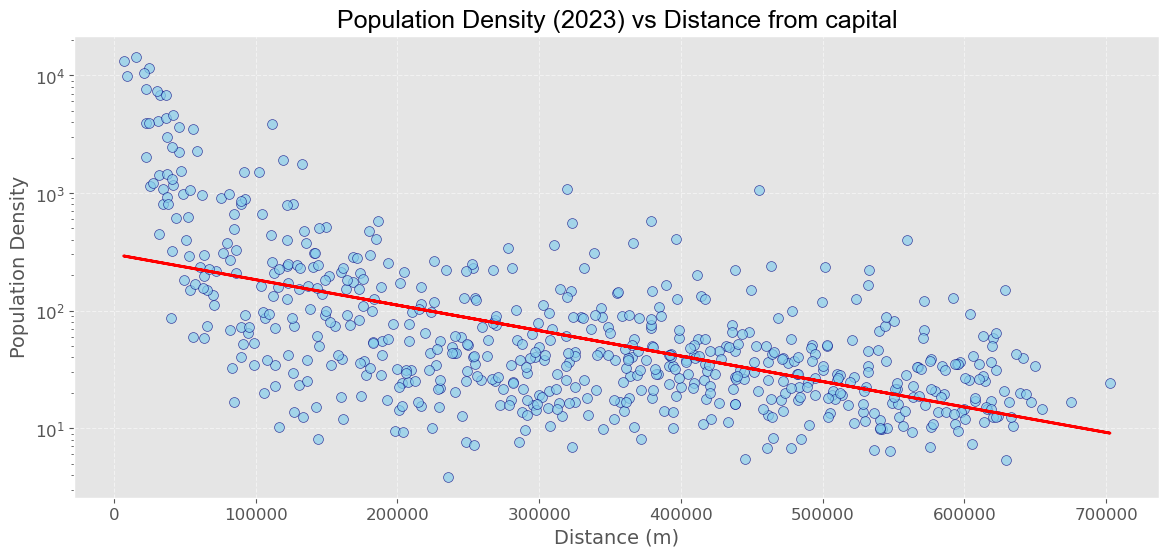

In [386]:
# Set style
plt.style.use('ggplot')

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(14, 6))

# Scatter plot
ax.scatter(merged_df['Distance'], merged_df['Den_Demo'], color='skyblue', edgecolor='navy', alpha=0.7, s=50)

merged_df['Distance'] = pd.to_numeric(merged_df['Distance'])
merged_df['Den_Demo'] = pd.to_numeric(merged_df['Den_Demo'])

params = np.polyfit(merged_df['Distance'], np.log(merged_df['Den_Demo']), 1)
a = np.exp(params[1])
b = params[0]
ax.plot(merged_df['Distance'], a * np.exp(b * merged_df['Distance']), color='red', linestyle='-', linewidth=2, label='Trend Line')


# Set labels and title
ax.set_title('Population Density (2023) vs Distance from capital', fontsize=18, fontname='Arial')
ax.set_xlabel('Distance (m)', fontsize=14)
ax.set_ylabel('Population Density', fontsize=14)

ax.set_yscale('log')

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('population_den.png')


# Show plot
plt.show()

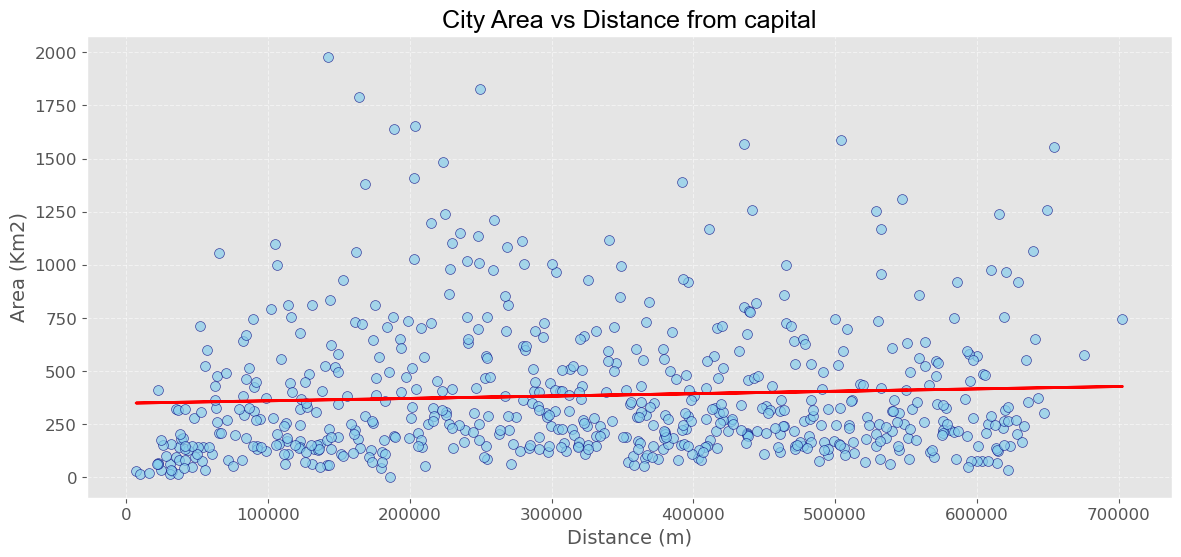

In [390]:
# Set style
plt.style.use('ggplot')

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(14, 6))

# Scatter plot
ax.scatter(merged_df['Distance'], merged_df['Area_Km2_x'], color='skyblue', edgecolor='navy', alpha=0.7, s=50)

m, b = np.polyfit(merged_df['Distance'], merged_df['Area_Km2_x'], 1)
ax.plot(merged_df['Distance'], m * merged_df['Distance'] + b, color='red', linestyle='-', linewidth=2, label='Trend Line')

# Set labels and title
ax.set_title('City Area vs Distance from capital', fontsize=18, fontname='Arial')
ax.set_xlabel('Distance (m)', fontsize=14)
ax.set_ylabel('Area (Km2)', fontsize=14)

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('area.png')


# Show plot
plt.show()

In [272]:
merged_df

,Cod_ibge_x,Nome_x,Rotulo,Area_Km2_x,Den_Demo,Pop,RA,RG,RM,AU,...,abr,mai,jun,jul,ago,set,out,nov,dez,geometry_right2
0,3500105,Adamantina,Adamantina,411.99,82.21,33821,RA de Presidente Prudente,RG de Adamantina,None,None,...,28,36,32,23,29,38,37,31,22,"POLYGON ((-51.17735 -21.69213, -51.17716 -21.6..."
1,3500204,Adolfo,Adolfo,211.06,16.18,3416,RA de São José do Rio Preto,RG de São José do Rio Preto,None,None,...,6,7,4,3,2,5,1,4,5,"POLYGON ((-49.74715 -21.29637, -49.74682 -21.2..."
2,3500303,Aguaí,Aguaí,474.55,76.77,36445,RA de Campinas,RG de São João da Boa Vista,None,None,...,22,19,26,28,25,27,24,25,21,"POLYGON ((-47.23298 -22.05409, -47.23289 -22.0..."
3,3500402,Águas da Prata,Águas da Prata,142.96,54.74,7826,RA de Campinas,RG de São João da Boa Vista,None,None,...,7,10,7,12,7,10,5,10,7,"POLYGON ((-46.75758 -21.84763, -46.75750 -21.8..."
4,3500501,Águas de Lindóia,Águas de Lindóia,60.13,308.80,18568,RA de Campinas,RG de Bragança Paulista,None,None,...,18,15,13,23,14,15,15,15,15,"POLYGON ((-46.66020 -22.47948, -46.66018 -22.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,3557006,Votorantim,Votorantim,183.52,664.62,122356,RA de Sorocaba,RG de Sorocaba,RM de Sorocaba,None,...,84,78,94,102,63,66,66,82,67,"POLYGON ((-47.51788 -23.54223, -47.51761 -23.5..."
628,3557105,Votuporanga,Votuporanga,420.70,221.04,93066,RA de São José do Rio Preto,RG de Votuporanga,None,None,...,60,68,57,77,73,73,71,86,58,"POLYGON ((-50.15453 -20.50451, -50.15453 -20.5..."
629,3557154,Zacarias,Zacarias,319.06,8.15,2602,RA de São José do Rio Preto,RG de São José do Rio Preto,None,None,...,0,2,1,0,0,3,0,1,2,"POLYGON ((-50.05581 -20.99883, -50.05574 -20.9..."
630,3557204,Chavantes,Chavantes,188.73,65.08,12241,RA de Marília,RG de Ourinhos,None,None,...,7,15,13,11,15,11,7,4,5,"POLYGON ((-49.82056 -23.07743, -49.82023 -23.0..."


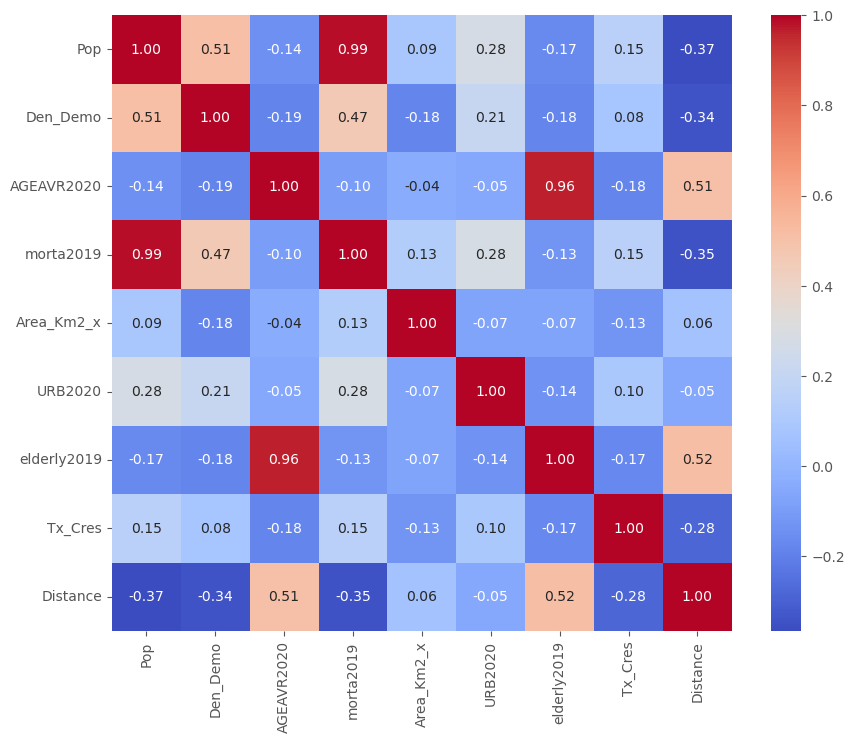

In [376]:
import seaborn as sns

selected_columns = ['Pop','Den_Demo','AGEAVR2020','morta2019','Area_Km2_x','URB2020','elderly2019','Tx_Cres','Distance']  # Specify the columns you want to include

# Select the specified columns from your DataFrame
selected_df = merged_df[selected_columns]

# Calculate the correlation matrix
corr_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.savefig('correlation_matrix.png')
plt.show()



In [282]:
column_names = merged_df.columns
print(column_names)

Index(['Cod_ibge_x', 'Nome_x', 'Rotulo', 'Area_Km2_x', 'Den_Demo', 'Pop', 'RA',
       'RG', 'RM', 'AU', 'RGI', 'RGINT', 'geometry_x', 'Distance', 'Category',
       'COD_IBGE0_x', 'NOME_x', 'URB1991', 'URB2000', 'URB2010', 'URB2020',
       'URB2030', 'URB2040', 'URB2050', 'geometry_y', 'COD_IBGE0_y', 'NOME_y',
       'growth1991', 'growth2000', 'growth2010', 'growth2020', 'growth2030',
       'growth2040', 'growth2050', 'geometry_left', 'COD_IBGE0', 'NOME',
       'AGEAVR1991', 'AGEAVR2000', 'AGEAVR2010', 'AGEAVR2020', 'AGEAVR2030',
       'AGEAVR2040', 'AGEAVR2050', 'geometry_right', 'Cod_ibge_y', 'Nome_y',
       'Area_Km2_y', 'elderly2019', 'geometry_left2', 'cod', 'morta2019',
       'jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out',
       'nov', 'dez', 'geometry_right2'],
      dtype='object')
